**This notebook is an example notebook of how you can explore and visualize the datasets**

In [2]:
# import some helper libraries
import pandas as pd # for working with dataframes
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns # for pretty plotting
import datetime # for dealing with datetime data

In [3]:
ticket_sales = pd.read_csv('datasets/ticket_sales_by_showing.csv')

In [4]:
ticket_sales.head()

,Folder,EventName,InternalEventName,EventDate,TicketType,Quantity,ItemPrice,Price
0,0 - Features,A Fantastic Woman,A Fantastic Woman,"Mar 16, 2018 5:00:00 PM",Adult,6,8.75,52.50
1,0 - Features,A Fantastic Woman,A Fantastic Woman,"Mar 16, 2018 5:00:00 PM",Member,1,0.00,0
2,0 - Features,A Fantastic Woman,A Fantastic Woman,"Mar 16, 2018 5:00:00 PM",Senior Citizen,13,8.00,104
3,0 - Features,A Fantastic Woman,A Fantastic Woman,"Mar 16, 2018 5:00:00 PM",Student,3,8.00,24
4,0 - Features,A Fantastic Woman,A Fantastic Woman,"Mar 16, 2018 7:30:00 PM",Adult,22,10.00,220


In [5]:
ticket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 8 columns):
Folder               9564 non-null object
EventName            9564 non-null object
InternalEventName    9564 non-null object
EventDate            9564 non-null object
TicketType           9564 non-null object
Quantity             9564 non-null int64
ItemPrice            9564 non-null float64
Price                9564 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 597.8+ KB


No missing values! This dataset is quite remarkable :D

Let's see what type of ticket has the highest sale! First, what are the ticket types?

In [8]:
ticket_sales['TicketType'].unique()

array(['Adult', 'Member', 'Senior Citizen', 'Student', 'Comp', 'Child',
       'Supporter Admission', 'Double Feature', 'Group', 'Discount',
       'Special Class Discount', 'Mogul', '$5 Discount', 'Senior',
       'Member Screening', 'NTL Member', 'NTL Non-Member',
       'Member - Special Event', 'Benefactor', 'PRN Benefactor',
       'Series Pass', 'Smart Kids Comp', 'All Nite Pass',
       'Shocktober Pass Admission', 'Special Event'], dtype=object)

I did not expect so many types of tickets. Still, let's get the sale number for each one!

In [21]:
ticket_sales_by_type = ticket_sales.groupby('TicketType').sum()
ticket_sales_by_type.reset_index(inplace = True)

In [22]:
ticket_sales_by_type

,TicketType,Quantity,ItemPrice
0,$5 Discount,25,5.00
1,Adult,56013,27907.25
2,All Nite Pass,60,35.00
3,Benefactor,25,100.00
4,Child,664,1770.25
5,Comp,2922,0.00
6,Discount,127,43.50
7,Double Feature,26,36.00
8,Group,25,7.00
9,Member,1511,22.50


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

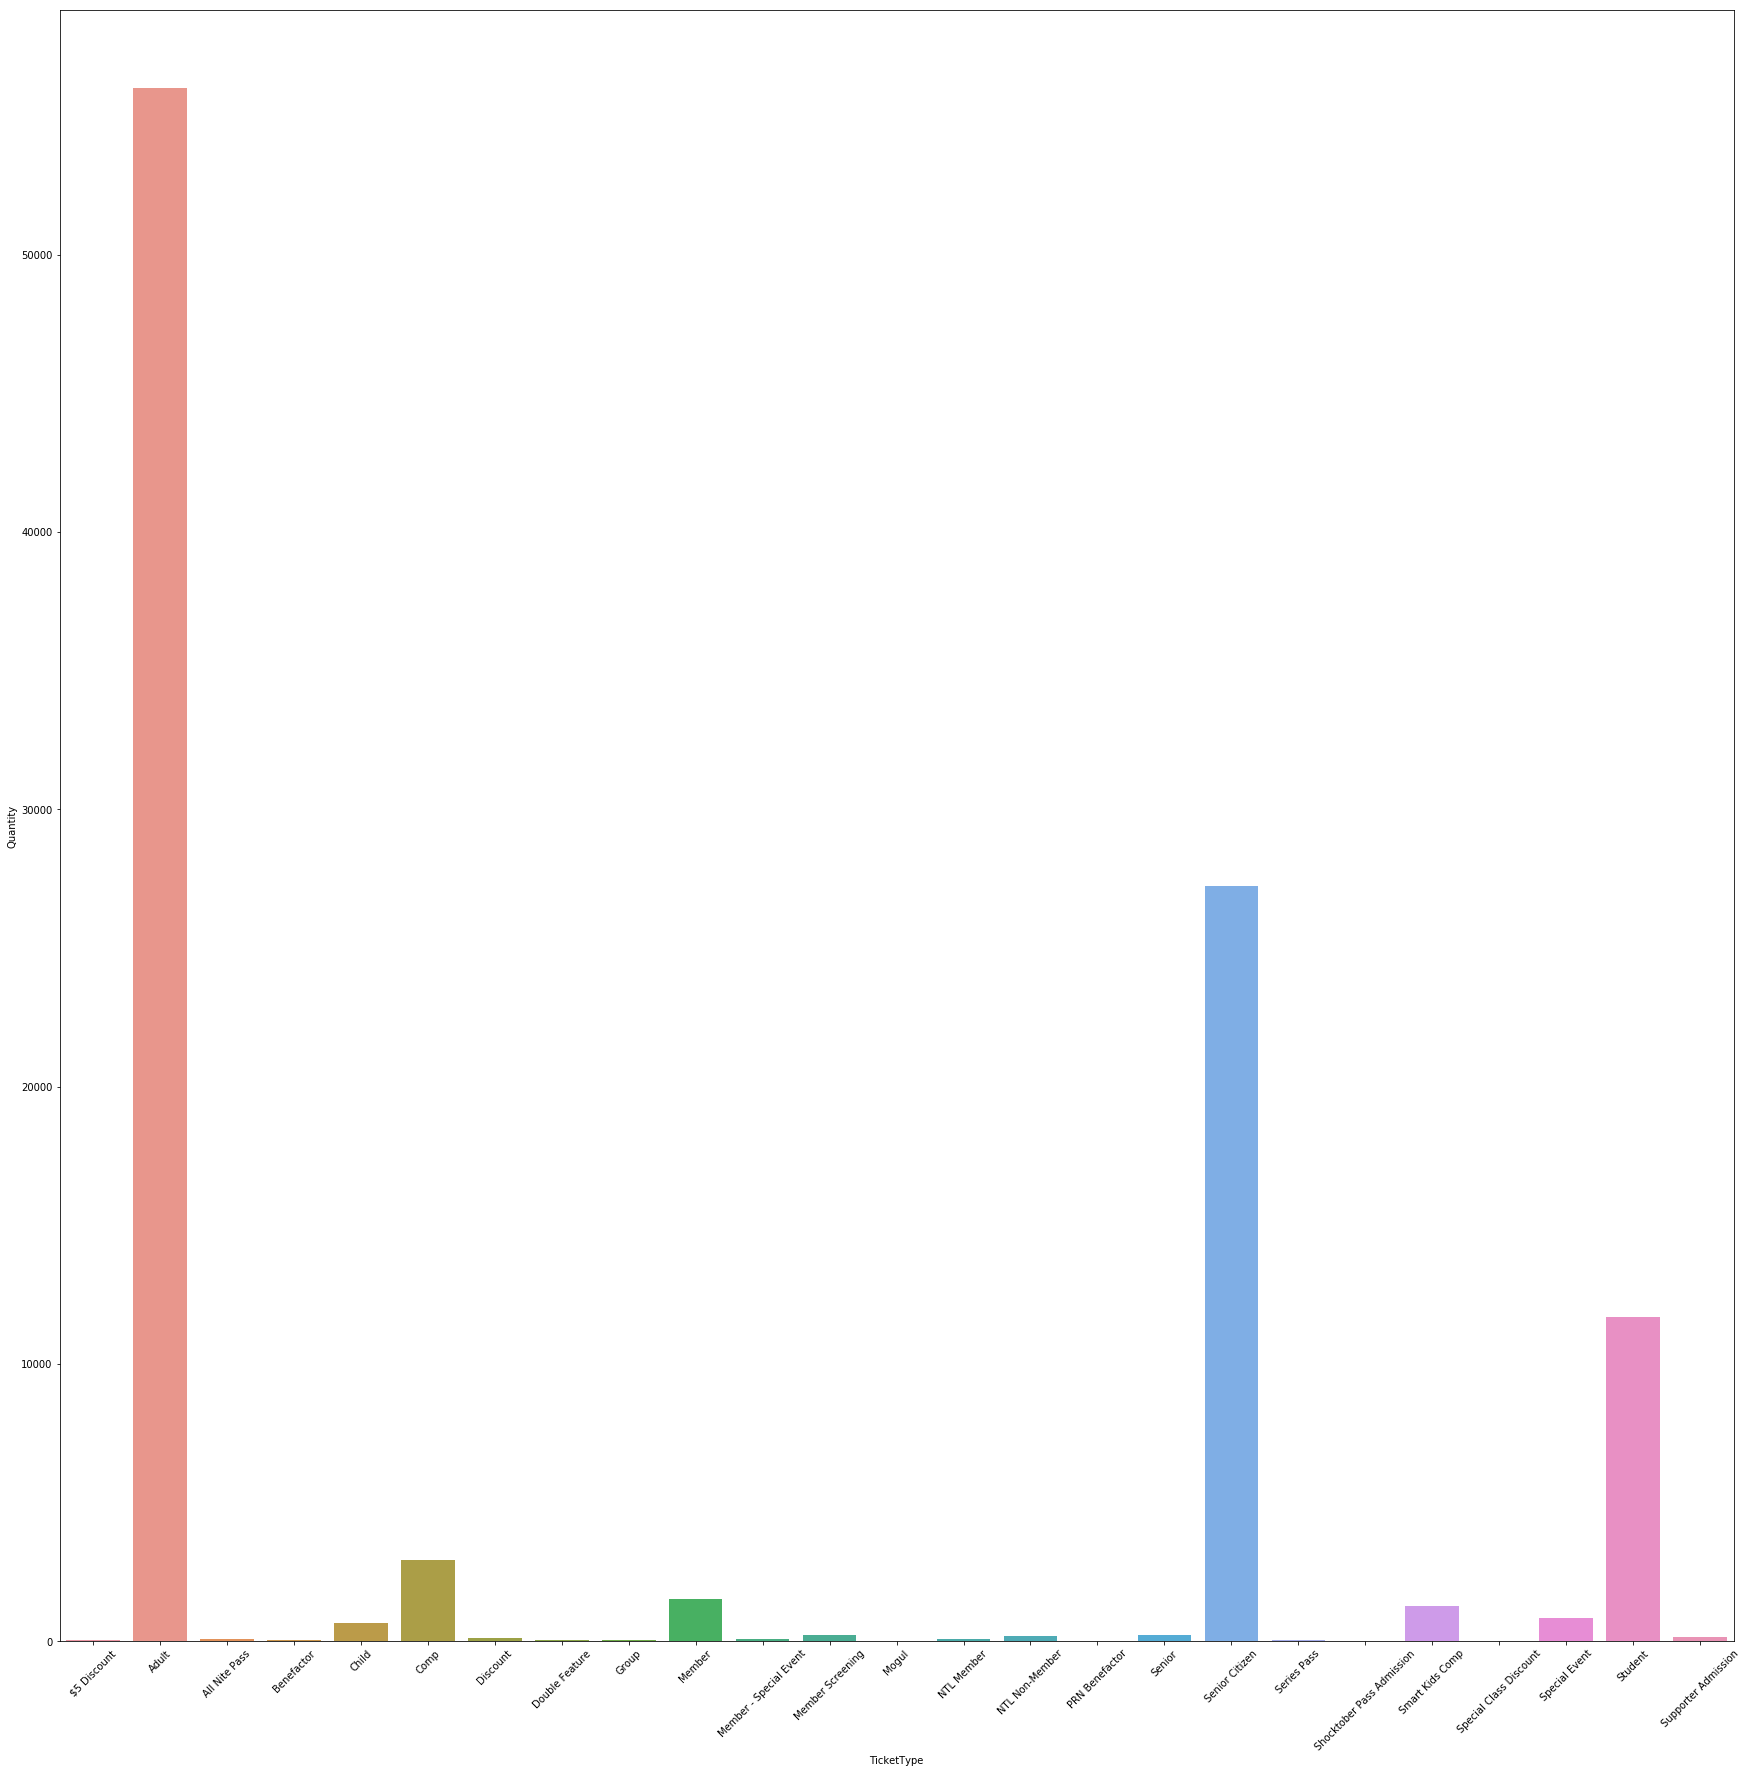

In [31]:
fig = plt.figure(figsize = (30, 30))
ax = sns.barplot(x = 'TicketType', y = 'Quantity', data = ticket_sales_by_type)
plt.xticks(rotation = 45)

So it seems like 'Adult', 'Senior Citizen', and 'Student' are the types with the highest ticket sales!